# Visualizations results

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from utils_visualizations import flatten_data, filter_and_boxplot

# remove waringns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file1 = "results-RF-anne.json"
file2= "results-RF-nadja.json"

with open(file1) as f:
    data1 = json.load(f)
print(len(data1))

with open(file2) as f:
    data2 = json.load(f)
print(len(data2))

data_all = data1 + data2
print(len(data_all))

73
116
189


In [3]:
data_all_flatten = flatten_data(data_all)
data = pd.DataFrame(data_all_flatten)
print(data.shape)
print(data.columns)
data.head()

(189, 39)
Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_FD_noise',
       'model_info_transformation', 'model_info_n_groups',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'seed', 'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_params_n_estimators',
       'unstratified_params_min_samples_split',
       'unstratified_params_min_samples_leaf',
       'unstratified_params_max_features', 'stratified_params_n_estimators',
       'stratified_params_min_samples_split',
       'stratified_params_min_samples_leaf', 'stratified_params_max_features',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_result

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_results_train mae,unstratified_results_test mae,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,unstratified_running_time,stratified_running_time
0,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0598,0.1246,0.9422,0.8073,0.0086,0.0308,0.0650,0.1246,303.64,313.17
1,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0490,0.1155,0.9727,0.8372,0.0048,0.0260,0.0490,0.1155,300.32,272.23
2,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0513,0.1227,0.9666,0.8227,0.0051,0.0284,0.0513,0.1227,303.37,297.96
3,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0738,0.1255,0.9279,0.8009,0.0106,0.0318,0.0738,0.1255,274.04,272.66
4,RandomForestRegressor,500,100000,10,0.0,log,20,5,100,30,...,0.0506,0.1215,0.9628,0.8008,0.0049,0.0318,0.0506,0.1215,293.70,289.65


Do first cleaning of data:

In [4]:
# drop n_train = 500
data = data[data.model_info_n_train!= 500]
print(data.shape)

# duplicates in data
print('duplicates: ', data.duplicated().sum())

# drop duplicates
data = data.drop_duplicates()
print(data.shape)

(166, 39)
duplicates:  0
(166, 39)


## Descriptives

### 1. Model Info

In [5]:
# corresponding model_info variables (categorical):
model_info_variables = ['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_FD_noise',
       'model_info_transformation', 'model_info_n_groups',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'hyperparameters_same']

# excluded: 'repetition', 'random_state',  'seed', 'model_info_json_file'

Unique Parameter Combinations:

In [6]:
unique_parameter_combinations = data.loc[:, model_info_variables[:-2]].drop_duplicates()
print("There are ", unique_parameter_combinations.shape[0], "parameter combinaitons:")
unique_parameter_combinations

There are  13 parameter combinaitons:


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring
23,RandomForestRegressor,200,100000,10,0.0,identity,10,5,200,10,neg_mean_squared_error
33,RandomForestRegressor,200,100000,10,0.0,sqrt,10,5,200,10,neg_mean_squared_error
43,RandomForestRegressor,200,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error
53,RandomForestRegressor,200,100000,10,0.0,sqrt,20,5,200,10,neg_mean_squared_error
63,RandomForestRegressor,200,100000,10,0.5,sqrt,20,5,200,10,neg_mean_squared_error
73,RandomForestRegressor,1000,100000,10,0.0,sqrt,10,5,200,20,neg_mean_squared_error
81,RandomForestRegressor,1000,100000,10,0.0,sqrt,10,5,200,10,neg_mean_squared_error
91,RandomForestRegressor,1000,100000,10,0.0,identity,10,5,200,10,neg_mean_squared_error
101,RandomForestRegressor,1000,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error
111,RandomForestRegressor,1000,100000,10,0.0,sqrt,20,5,200,10,neg_mean_squared_error


In [7]:
# give summary of every column
data_desciptives = data.loc[:, model_info_variables]
# in data_desciptives make all columns categorical
data_desciptives = data_desciptives.astype('category')
# show summary of every column
data_desciptives.describe(include='all')


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring,model_info_n_jobs,hyperparameters_same
count,166,166,166,166,166.0,166,166,166,166,166,166,166,166
unique,1,2,1,1,3.0,2,2,1,1,2,3,1,2
top,RandomForestRegressor,1000,100000,10,0.0,identity,20,5,200,10,neg_mean_squared_error,-1,True
freq,166,116,166,166,88.0,108,118,166,166,90,118,166,129


In [8]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
RandomForestRegressor    166
Name: count, dtype: int64


model_info_n_train
1000    116
200      50
Name: count, dtype: int64


model_info_n_test
100000    166
Name: count, dtype: int64


model_info_n_features
10    166
Name: count, dtype: int64


model_info_FD_noise
0.0    88
2.0    68
0.5    10
Name: count, dtype: int64


model_info_transformation
identity    108
sqrt         58
Name: count, dtype: int64


model_info_n_groups
20    118
10     48
Name: count, dtype: int64


model_info_n_folds
5    166
Name: count, dtype: int64


model_info_n_iter
200    166
Name: count, dtype: int64


model_info_n_repetitions
10    90
20    76
Name: count, dtype: int64


model_info_scoring
neg_mean_squared_error     118
neg_mean_absolute_error     28
r2                          20
Name: count, dtype: int64


model_info_n_jobs
-1    166
Name: count, dtype: int64


hyperparameters_same
True     129
False     37
Name: count, dtype: int64



### 2. Evaluation resutls

In [9]:
data.columns
# corresponding variables variables
evaluation_variables = ['unstratified_params_n_estimators',
       'unstratified_params_min_samples_split',
       'unstratified_params_min_samples_leaf',
       'unstratified_params_max_features', 'stratified_params_n_estimators',
       'stratified_params_min_samples_split',
       'stratified_params_min_samples_leaf', 'stratified_params_max_features',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'unstratified_running_time', 'stratified_running_time']
len(evaluation_variables)

22

In [10]:
data_desciptives = data.loc[:, evaluation_variables]
data_desciptives.describe(include='all')


,unstratified_params_n_estimators,unstratified_params_min_samples_split,unstratified_params_min_samples_leaf,unstratified_params_max_features,stratified_params_n_estimators,stratified_params_min_samples_split,stratified_params_min_samples_leaf,stratified_params_max_features,unstratified_results_train r2,unstratified_results_test r2,...,unstratified_results_train mae,unstratified_results_test mae,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,unstratified_running_time,stratified_running_time
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,756.692771,3.590361,1.475904,6.650602,765.277108,3.650602,1.433735,6.608434,0.963428,0.797169,...,0.545431,1.309552,0.963593,0.797182,0.697687,3.801013,0.544884,1.309487,492.242831,473.713072
std,150.718870,1.371008,0.535999,1.378921,147.611473,1.334246,0.543675,1.426052,0.014164,0.055926,...,0.358006,0.837333,0.014282,0.055894,0.596881,3.028924,0.357364,0.837227,1816.315993,1500.820737
min,506.000000,2.000000,1.000000,4.000000,506.000000,2.000000,1.000000,4.000000,0.916300,0.741100,...,0.066000,0.177500,0.916300,0.741200,0.007400,0.052400,0.065600,0.177500,272.450000,269.010000
25%,601.000000,3.000000,1.000000,6.000000,617.750000,3.000000,1.000000,6.000000,0.954050,0.752500,...,0.098350,0.250525,0.955600,0.752500,0.016525,0.105425,0.098350,0.250875,283.450000,284.687500
50%,788.500000,3.000000,1.000000,6.000000,791.000000,3.000000,1.000000,6.000000,0.964700,0.764950,...,0.664600,1.750800,0.964700,0.765100,0.742750,4.812100,0.669550,1.757700,302.745000,304.090000
75%,875.000000,4.000000,2.000000,7.000000,879.000000,5.000000,2.000000,7.000000,0.975300,0.877000,...,0.858100,2.079625,0.975800,0.877000,1.091900,6.838950,0.835025,2.079625,395.220000,393.445000
max,994.000000,9.000000,3.000000,10.000000,994.000000,9.000000,3.000000,10.000000,0.984600,0.889800,...,1.103700,2.139400,0.984500,0.889900,1.938400,7.198200,1.077700,2.139200,23714.190000,19609.320000


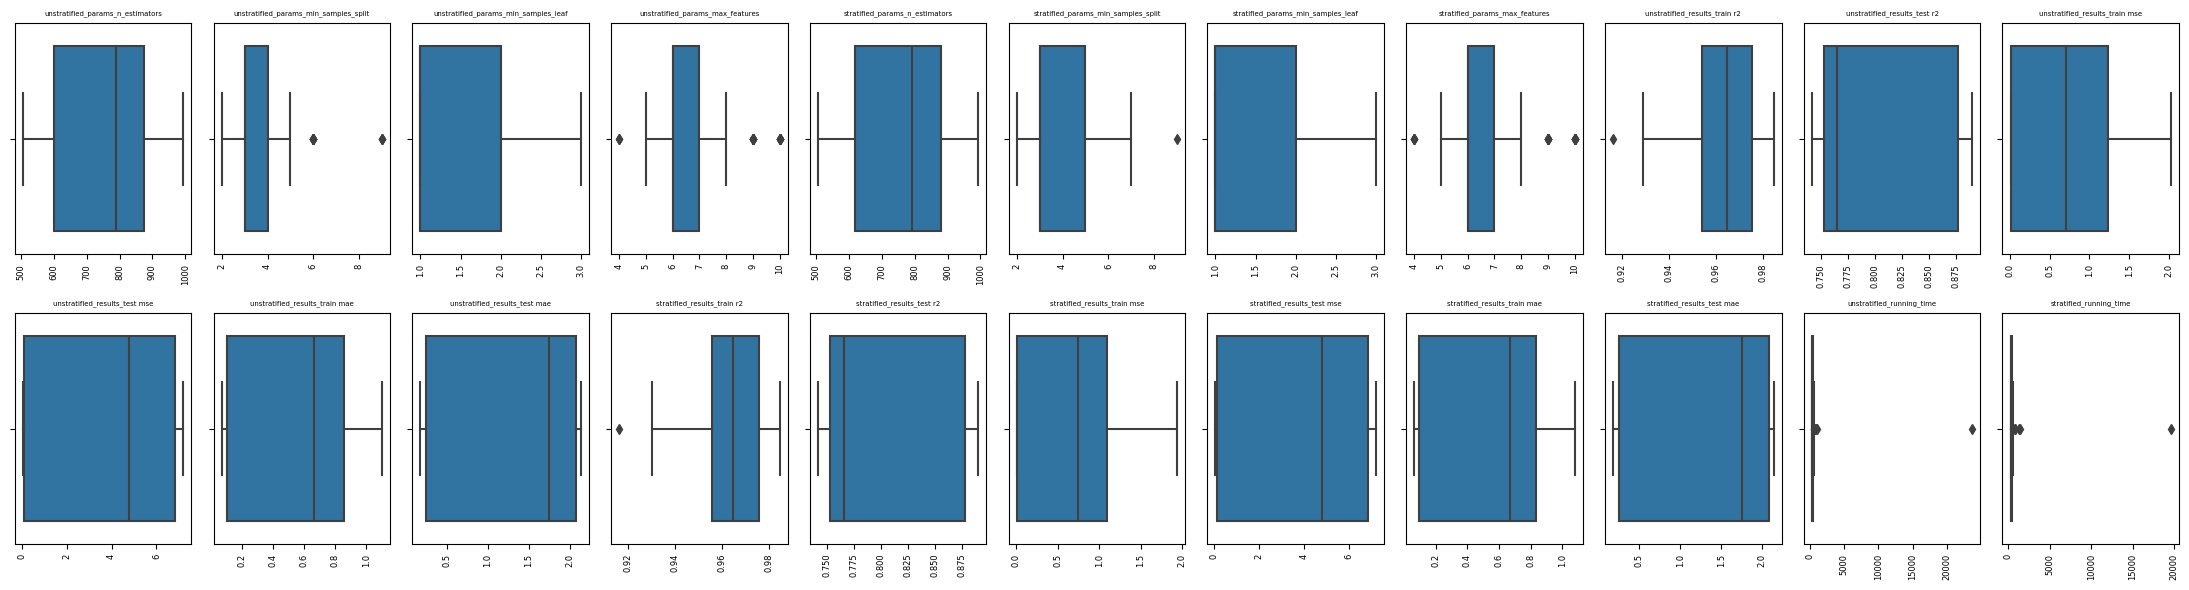

In [11]:
fig, axes = plt.subplots(2, 11, figsize=(22, 6))

for i, column in enumerate(data_desciptives.columns):
    ax = axes[i // 11, i % 11]
    sns.boxplot(x=data_desciptives[column], ax=ax)
    ax.set_title(column, fontsize=5) 
    ax.set_xlabel('', fontsize=5)  
    ax.set_ylabel('', fontsize=5) 
    ax.tick_params(axis='x', rotation=90, labelsize=6)  
    ax.tick_params(axis='y', labelsize=6)  

plt.tight_layout()
plt.show()
    

#### Boxplots Evaluation metrics

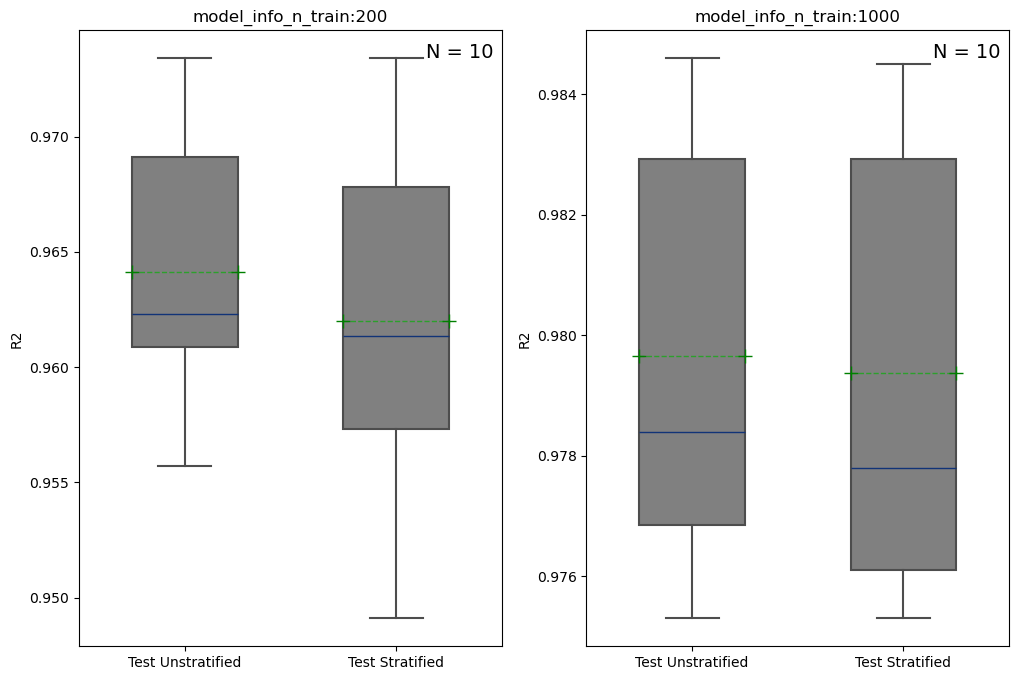

In [14]:
parameter_grid = {
    "model_info_model": 'RandomForestRegressor',
    "model_info_transformation": 'identity',
    "model_info_n_train": None,
    "model_info_n_features": 10,
    "model_info_n_groups": 20,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_FD_noise": 0,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 200
value2 = 1000

filter_and_boxplot(data, parameter_grid, value1, value2)